###Paddy crop disease detection using VGG16

##Importing header files

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

generator = data_gen.flow_from_directory(
    '/content/drive/MyDrive/rice/',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = data_gen.flow_from_directory(
    '/content/drive/MyDrive/rice/',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print("Classes found : ",generator.class_indices)

Found 4767 images belonging to 4 classes.
Found 1189 images belonging to 4 classes.
Classes found :  {'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history  = model.fit(generator,epochs=10,validation_data=val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 3390s 23s/step - accuracy: 0.6588 - loss: 1.4636 - val_accuracy: 0.9050 - val_loss: 0.2500
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 32s 212ms/step - accuracy: 0.9041 - loss: 0.2439 - val_accuracy: 0.9739 - val_loss: 0.0936
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 35s 235ms/step - accuracy: 0.9496 - loss: 0.1367 - val_accuracy: 0.9907 - val_loss: 0.0584
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 32s 211ms/step - accuracy: 0.9665 - loss: 0.0980 - val_accuracy: 0.9924 - val_loss: 0.0347
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 35s 235ms/step - accuracy: 0.9736 - loss: 0.0826 - val_accuracy: 0.9849 - val_loss: 0.0488
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 31s 206ms/step - accuracy: 0.9706 - loss: 0.0779 - val_accuracy: 0.9941 - val_loss: 0.0278
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 35s 238ms/step - accuracy: 0.9743 - loss: 0.0800 - val_accuracy: 0.9983 - val_loss: 0.0152
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 31s 206ms/step - accuracy: 0.9804 - loss: 0

In [8]:
model.save('/content/drive/MyDrive/VGG16_Rice_Model.h5')

In [9]:
import os
model.save('C:/Users/karur/Documents/VGG16_Rice_Model.h5')

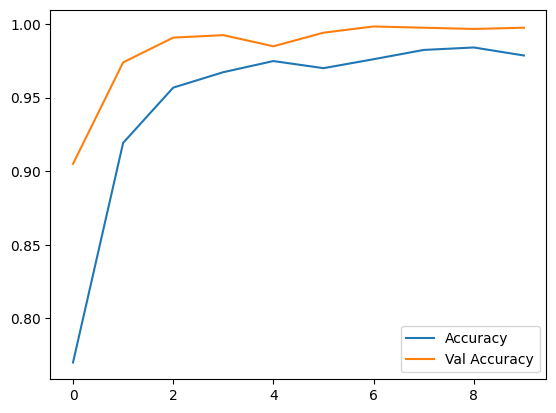

In [10]:
plt.plot(history.history['accuracy'],label = 'Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.legend()
plt.show()

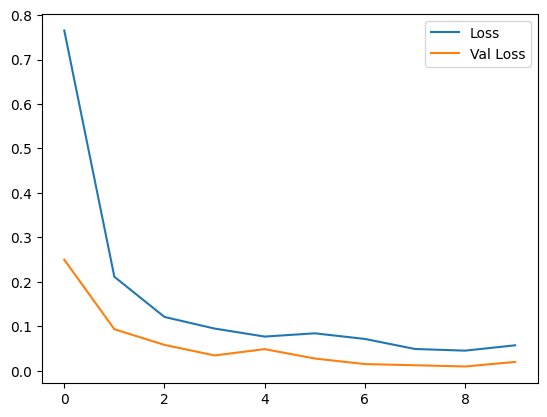

In [11]:
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'Val Loss')
plt.legend()
plt.show()